In [6]:
import pandas as pd
import numpy as np

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [8]:
df_losses=pd.read_csv('Automobile-losses.csv')
df_risk=pd.read_csv('Automobile-risk.csv')
df_spec=pd.read_csv('Automobile-spec.csv')

In [9]:
df=pd.merge(df_losses,df_risk,how='inner',on='ID')
df=pd.merge(df,df_spec,how='inner',on='ID')

In [14]:
df.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [42]:
df.corr()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,1.000000,-0.221681,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.261622,-0.161799,0.150276,-0.014415,-0.203775,0.015940,0.011255,-0.110874
normalized-losses,-0.221681,1.000000,0.457484,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.072536,-0.049534,0.045133,-0.114772,0.166964,0.241470,-0.189530,-0.149357,0.095489
symboling,-0.151621,0.457484,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071064,0.274573,-0.035823,0.034606,-0.080149
wheel-base,0.129729,-0.073709,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352876,-0.361052,-0.470414,-0.544082,0.584847
length,0.170636,-0.006837,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.553337,-0.287325,-0.670909,-0.704662,0.686567
width,0.052387,0.058378,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.641337,-0.219957,-0.642704,-0.677218,0.724558
height,0.255960,-0.365674,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.109286,-0.322272,-0.048640,-0.107358,0.140439
curb-weight,0.071962,0.064343,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.750927,-0.266306,-0.757414,-0.797465,0.819817
engine-size,-0.033930,0.072536,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810216,-0.244618,-0.653658,-0.677470,0.860343
bore,0.261622,-0.049534,-0.134205,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.575368,-0.264269,-0.594584,-0.594572,0.533139


In [43]:
df.isnull().sum() # terdapat 6 field yang mempunyai missing value

ID                   0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [34]:
#Trial adalah dataset dari df yang digunakan untuk percobaan
trial=df

### Menggunakan 2 feature yaitu 'Engine-size' dan 'Horsepower'

In [114]:
test=trial[['engine-size','horsepower']]

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

### Scale Data
Digunakan scale data karena pada semua metode klastering yang digunakan yaitu KMeans, Hierarki dan DBSCAN <br>
menggunakan jarak sebagai parameter dan jarak sangat bergantung dengan satuan atribut/feature

In [116]:
mod=scaler.fit(test)

In [117]:
X=mod.transform(test)

Text(0.5,1,'Engine-Size vs Horsepower')

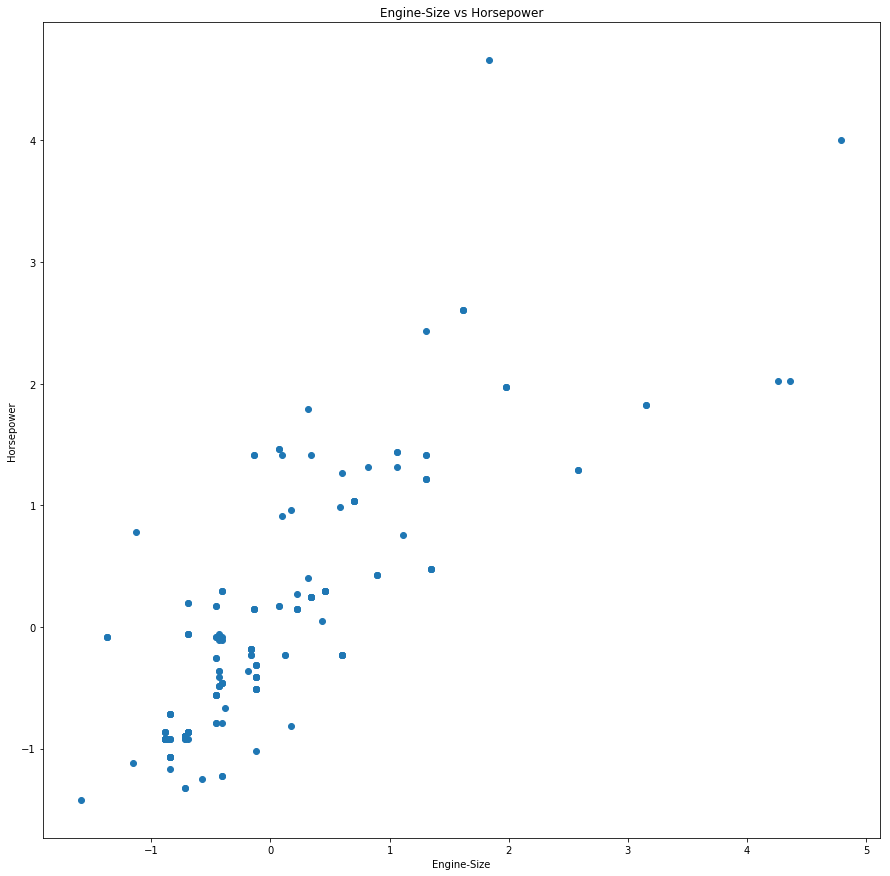

In [188]:
## Menampilkan data ke dalam grafik scatterplot 
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Engine-Size")
plt.ylabel("Horsepower")
plt.title("Engine-Size vs Horsepower")

In [121]:
from sklearn.cluster import KMeans

### Menentukan nilai K
Untuk menentukan nilai K akan dicoba menggunakan elbow method

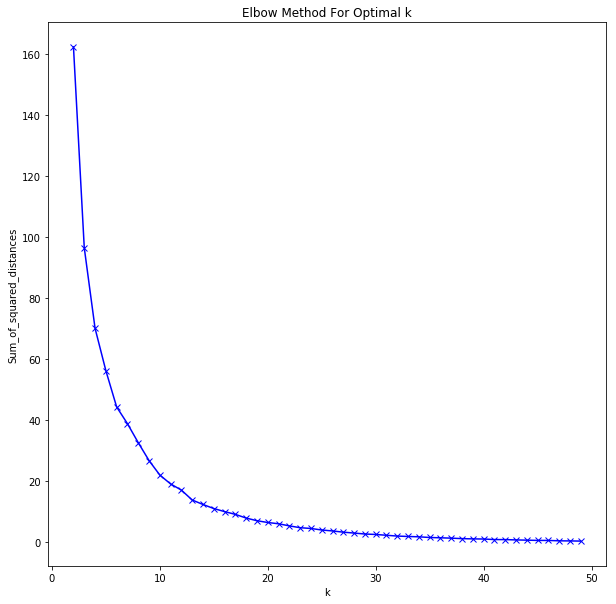

In [137]:
Sum_of_squared_distances = []
plt.figure(figsize=(10,10))
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan elbow method di atas masih sulit untuk ditentukan nilai K nya , kemungkinan berada pada interval 10 s.d 20 <br>
oleh karena itu akan dilihat menggunakan metode silhouette score

### Silhouette Score

In [208]:
from sklearn.metrics import silhouette_score
skor=[]
#Silhoute SCore
for n_clusters in range(10,22):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    skor.append(score)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 10, silhouette score is 0.5286044959388911)
For n_clusters = 11, silhouette score is 0.5369553568349431)
For n_clusters = 12, silhouette score is 0.5488365973168784)
For n_clusters = 13, silhouette score is 0.5231438881622574)
For n_clusters = 14, silhouette score is 0.5454568720701122)
For n_clusters = 15, silhouette score is 0.5737388477170409)
For n_clusters = 16, silhouette score is 0.5886788082242763)
For n_clusters = 17, silhouette score is 0.5539195343371235)
For n_clusters = 18, silhouette score is 0.5830776149943424)
For n_clusters = 19, silhouette score is 0.5912555465063378)
For n_clusters = 20, silhouette score is 0.5884288056205115)
For n_clusters = 21, silhouette score is 0.5776193419556968)


Berdasarkan silhouette scorenya pada interval 10-20 nilai tertinggi ada pada nilai n_cluster=19.<br>
Sehingga akan digunakan nilai K = 19 dengan silhouette scorenya adalah 0.59125

In [193]:
# Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=20)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [194]:
# Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[-0.80302102 -0.8992415 ]
 [ 1.21187937  1.3334993 ]
 [ 0.32319915  0.23610401]
 [ 4.31122687  2.02454134]
 [-0.54799978 -0.06035877]
 [ 1.83174887  4.6619128 ]
 [ 0.09852153  1.36238077]
 [ 1.53685949  2.56342734]
 [-0.41542852 -0.56464738]
 [ 2.57799953  1.28912045]
 [ 1.14868879  0.49347113]
 [-0.30001377  0.2043042 ]
 [ 4.79267891  4.00256994]
 [-0.10368833 -0.35416485]
 [ 0.60404617 -0.23244001]
 [-1.30972569  0.13527044]
 [ 1.97618448  1.97382266]
 [-0.80119197 -1.2563234 ]
 [ 3.15574198  1.82166661]
 [ 0.68830028  1.09258556]]


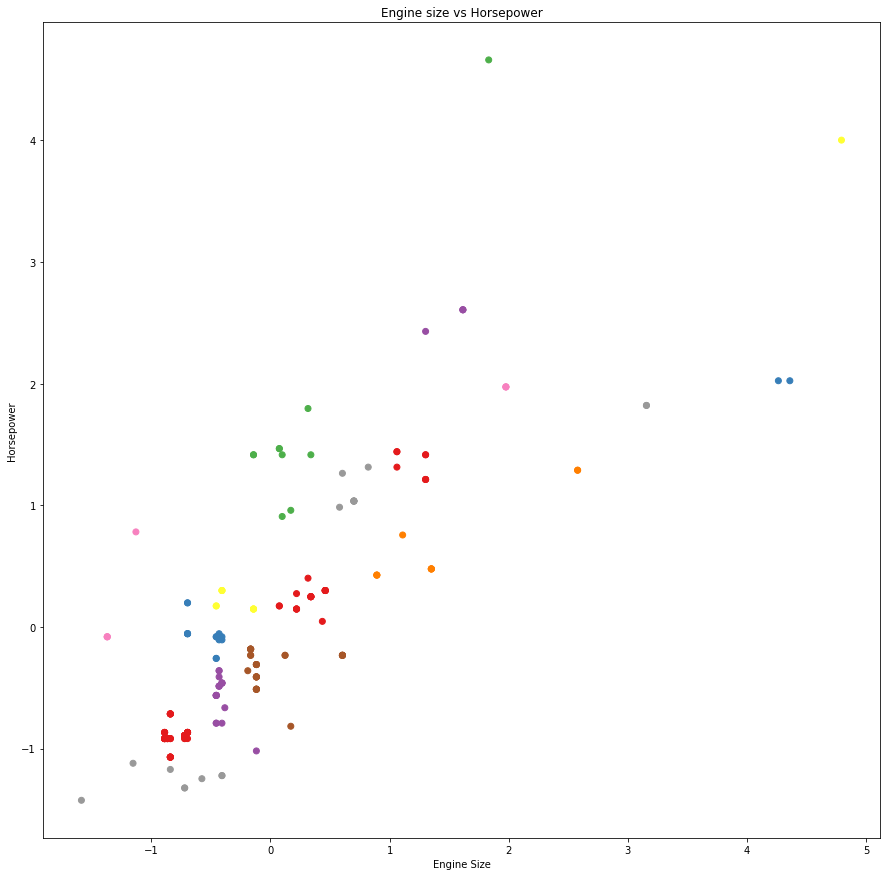

In [195]:
# Step 7 Visualisasi Hasil 
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='Set1')
plt.xlabel("Engine Size")
plt.ylabel("Horsepower")
plt.title("Engine size vs Horsepower")
plt.show()

# Hierarchical Clustering

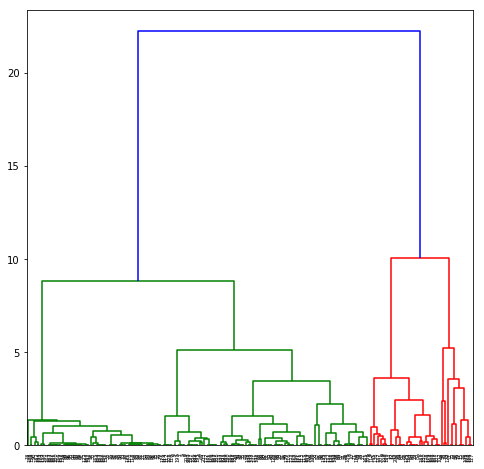

In [150]:
plt.figure(figsize=(8,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Dengan melihat dari dendogram di atas disarankan untuk menggunakan nilai K=3, <br>
Sehingga banyaknya klaster yang dibentuk adalah 3 kelompok.

In [196]:
# Melakukan hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

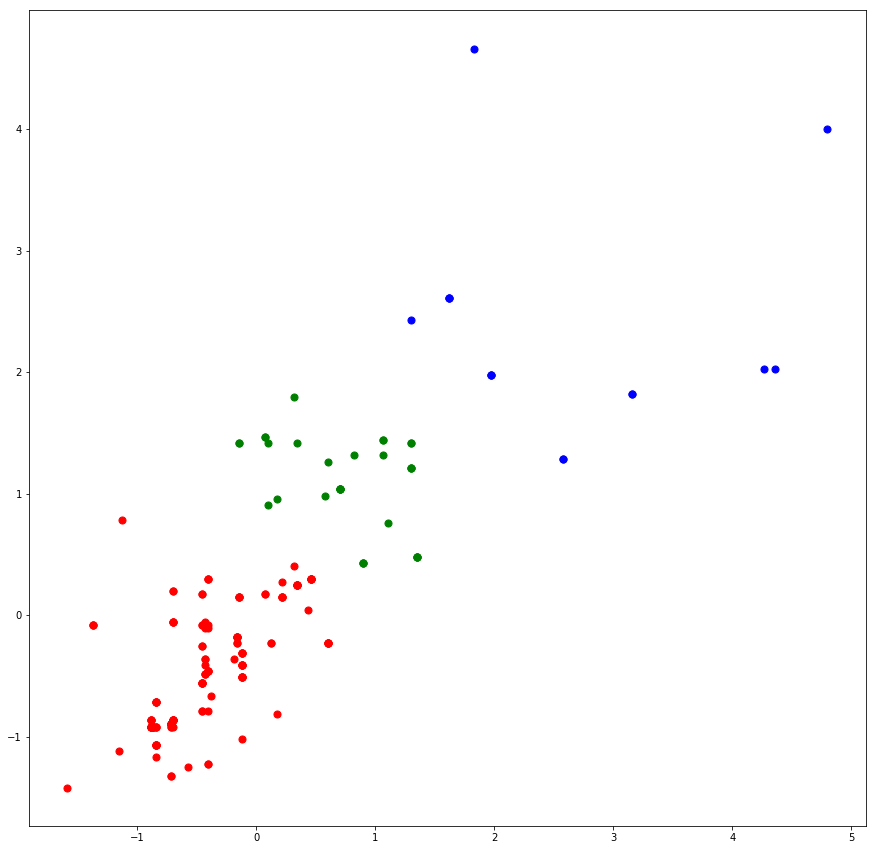

In [197]:
# Mengeplot Data setelah dilakukan hierarchical clustering
plt.figure(figsize=(15,15))
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.show()

In [198]:
skor=[]
#Silhoute SCore
for n_clusters in [3]:
    model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
    preds=model.fit(X)
    label=preds.labels_

    score = silhouette_score (X, label)
    skor.append(score)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.5325815349936047)


# DBSCAN

In [83]:
from sklearn.cluster import DBSCAN

In [204]:
#Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=0.28,min_samples=4)
preds=dbscan.fit(X)
label=preds.labels_
label

array([ 0,  0,  1,  2,  0,  0,  0,  0, -1,  3,  2,  2, -1, -1, -1, -1, -1,
       -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  2,  2, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,  2,
        2,  2,  2,  2, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  0, -1,  4,
        4,  4,  4, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,
        1,  1,  1, -1,  1,  2,  5,  2,  5,  2,  5,  2,  5,  2,  5, -1,  2,
        2,  2,  2,  2,  2,  1,  1, -1, -1, -1, -1,  2,  2,  0,  0,  0,  0,
        3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  0,  0,  0,
        0,  0,  0,  2,  2,  2,  2,  2,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  0,  2,  2,  0,  0,  0,  0,  3,  3,  0,  3, -1,  0,
        0], dtype=int64)

Dari label di atas  dengan menggunakan algoritma DBSCAN terbentuk 6 klaster

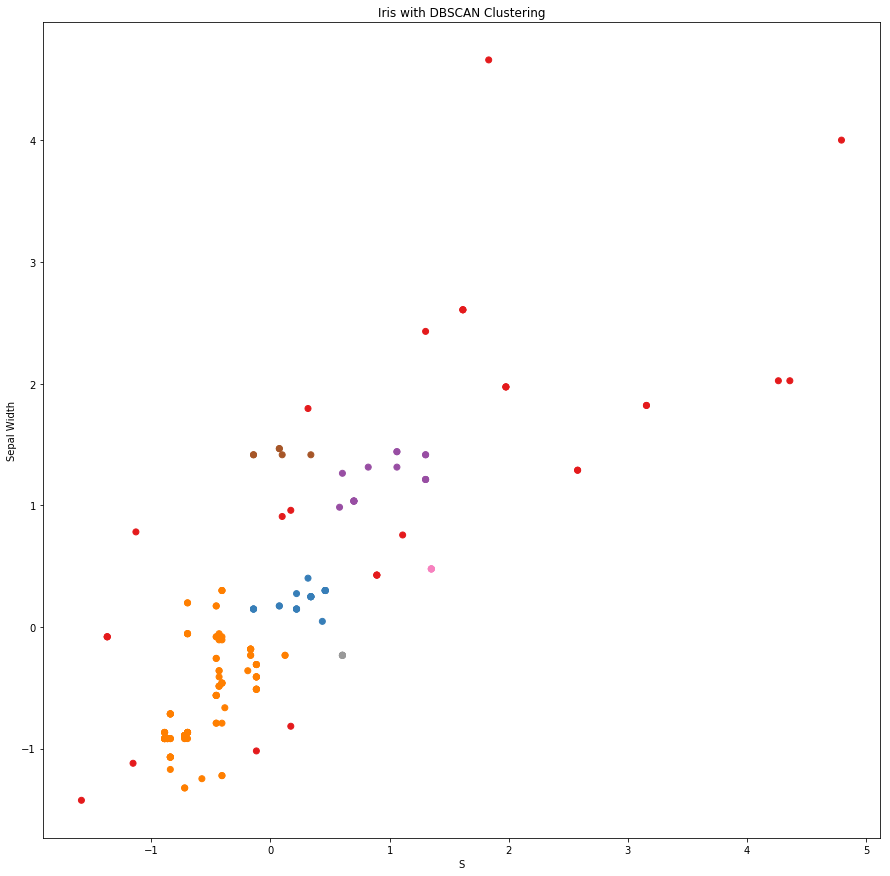

In [201]:
#Plot hasil setelah dilakukan algoritma DBSCAN
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='Set1')
plt.xlabel("S")
plt.ylabel("Sepal Width")
plt.title("Iris with DBSCAN Clustering")
plt.show()

In [206]:
skor=[]
#Silhoute SCore
n_clusters=6
dbscan=DBSCAN(eps=0.28,min_samples=4)
preds=dbscan.fit(X)
label=preds.labels_

score = silhouette_score (X, label)
skor.append(score)
print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 6, silhouette score is 0.34836486897062535)


# Kesimpulan

### Berapa cluster yang Anda buat? Anda menggunakan atribut/feature apa saja?
Banyak Kluster yang terbentuk :
* Metode KMeans terbentuk 20 klaster
* Metode Hierarchical Clustering terbentuk 3 klaster
* Metode DBSCAN terbentuk 6 klaster

Feature yang digunakan :
* Menggunakan feature Engine-size dan Horsepower
Digunakan 2 fitur tersebut karena kedua feature tersebut numerik kemudian nilai korelasi kedua feature tersebut sangat tinggi yaitu 0.81

### Manakah algoritma clustering yang Anda ambil?Mengapa?
Saya mengambil algoritma Kmeans karena silhouette scorenya paling tinggi yaitu sekitar 0.59 <br>
dan juga membentuk klaster 19 merk klaster (mendekati dengan jenis mobil yang ada yaitu sebanyak merk 21 mobil)

### Apakah masing-masing cluster memiliki ciri-ciri yang berbeda? Apa saja ciri-ciri masing-masing cluster?
Berdasarkan hasil dari masing masing model :<br>
KMeans : <br>
* Terdapat minimal 1 parameter yaitu K
* Pada Klaster yang terbentuk tidak hierarki
* Klaster yang terbentuk tidak overlap antar klaster yang terbentuk
* Hasil lebih bagus untuk data dengan ukuran yang besar

Hierarchical CLustering :
* Terdapat minimal 2 parameter Linkage dan method yang digunakan
* Kurang baik untuk data yang kontinu dan data yang besar karena akan sulit membaca dendogram dikarenakan akan banyak sekali data


DBSCAN :
* Terdapat 2 parameter yaitu epsilon dan minimum points untuk digunakan
* Bentuk pola klasternya bisa beragam tidak harus lingkaran 
